In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Lab Task 1 – Convolution Operation 

In [34]:
def convolution2d(image, kernel):
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    
    
    padding_h = (kernel_h - 1) // 2
    padding_w = (kernel_w - 1) // 2

    padded_image = np.pad(image, ((padding_h, padding_h), (padding_w, padding_w)), mode='constant', constant_values=0)
    output = np.zeros((image_h, image_w))

    print(output.size)
    
    for i in range(image_h):
        for j in range(image_w):
            new = padded_image[i:i+kernel_h, j:j+kernel_w]
            output[i, j] = np.sum(new * kernel)
    return output

image = np.random.rand(8, 4)
print(image)
kernel = np.random.rand(3, 3)
kernel = np.flipud(np.fliplr(kernel))

convolution2d(image,kernel)

[[0.46071321 0.41778157 0.92553728 0.17529944]
 [0.16095313 0.23524217 0.42211084 0.34234915]
 [0.68526689 0.78811224 0.91168339 0.23770834]
 [0.52039443 0.61715341 0.16071685 0.65319141]
 [0.82758739 0.21614125 0.05500771 0.6427653 ]
 [0.56377586 0.37909838 0.49053321 0.30366045]
 [0.99355233 0.05905931 0.01045691 0.938843  ]
 [0.05903226 0.86994688 0.62122474 0.98225397]]
32


array([[0.83295634, 1.44322807, 1.28889365, 0.59617917],
       [1.25193057, 1.95134505, 1.9576085 , 0.93740716],
       [1.74123204, 2.12738769, 1.67246163, 0.87410229],
       [1.77145025, 1.50474359, 1.45511916, 1.03351662],
       [1.46765144, 1.20203252, 1.34684903, 1.06059781],
       [1.64130462, 1.30081425, 1.10200036, 1.07439992],
       [1.30257858, 1.19388429, 2.16205927, 1.66005265],
       [1.07268484, 1.16838637, 1.37139672, 1.00038536]])

### Lab Task 2 – Averaging Filters 

880640
880640
880640
880640


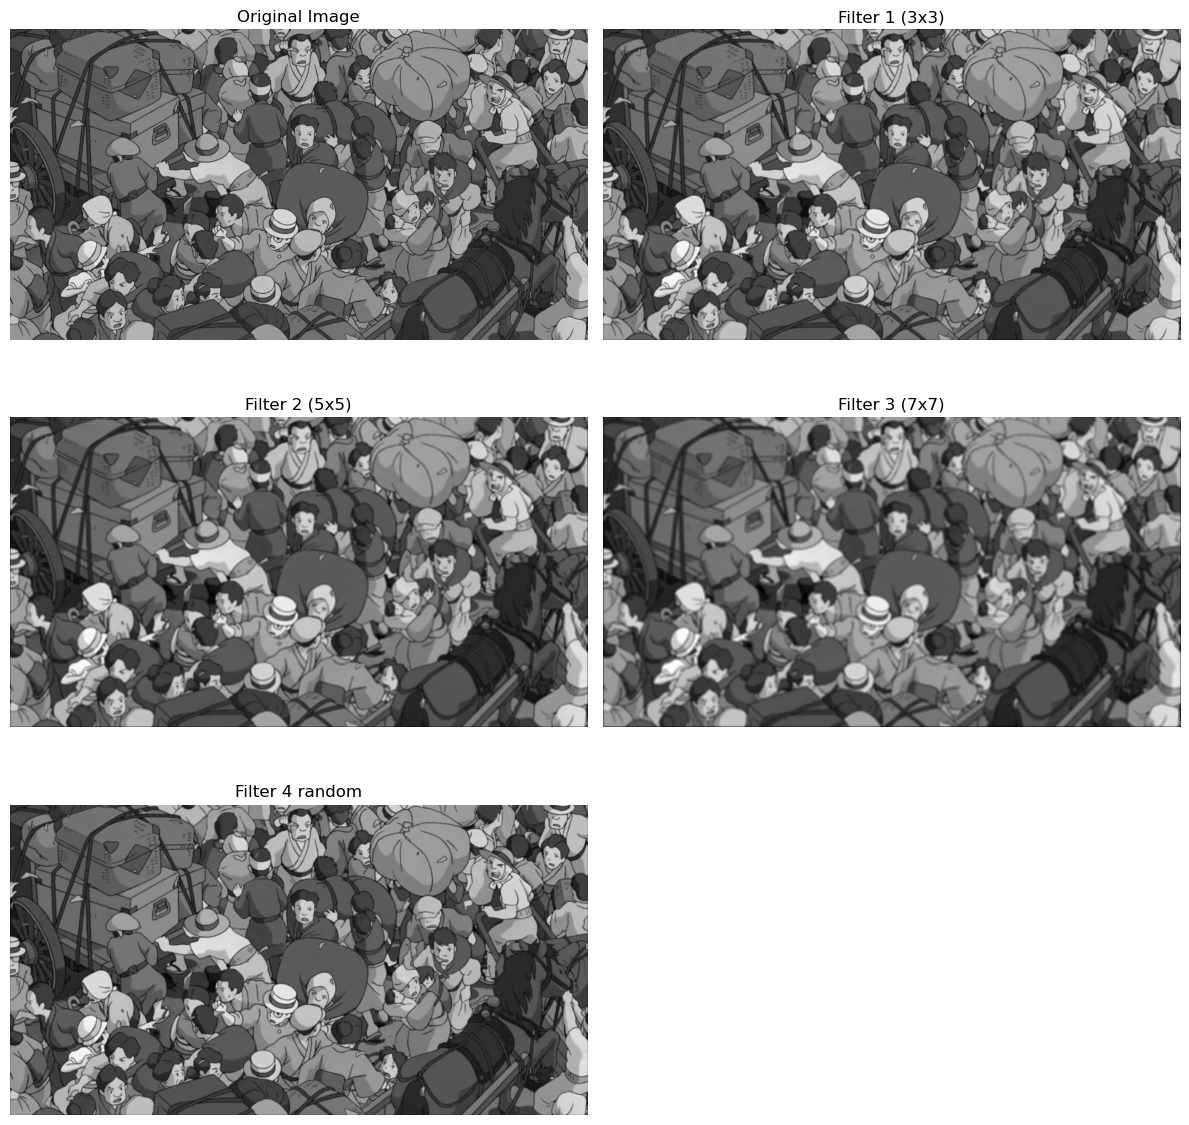

In [35]:
task1_img = cv2.imread('crowd.png', cv2.IMREAD_GRAYSCALE)
filter1=  (1/9)* np.ones(shape=(3,3))
filter2 = (1/25)* np.ones(shape=(5,5))
filter3 = (1/49)* np.ones(shape=(7,7))
filter4 = np.array([[1, 2,1], [2,4,2], [1,2,1]])
filter4 = 1/16 *filter4

output1 = convolution2d(task1_img,filter1)
output2 = convolution2d(task1_img,filter2)
output3 = convolution2d(task1_img,filter3)
output4 = convolution2d(task1_img,filter4)

plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.imshow(task1_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(output1, cmap='gray')
plt.title('Filter 1 (3x3)')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(output2, cmap='gray')
plt.title('Filter 2 (5x5)')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(output3, cmap='gray')
plt.title('Filter 3 (7x7)')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(output4, cmap='gray')
plt.title('Filter 4 random')
plt.axis('off')

plt.tight_layout()
plt.show()

### Lab Task 3 – Gaussian Filter 

In [36]:
def guassian_filter2d(sigma):
   size = int(2 * (np.pi * sigma))
   if size % 2 == 0:
    size += 1
   kernel = np.zeros((size, size))
   for x in range(size):
       for y in range(size):
           kernel[x, y] = (1/(2 * np.pi * sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2) / (2 * sigma**2))
   return kernel

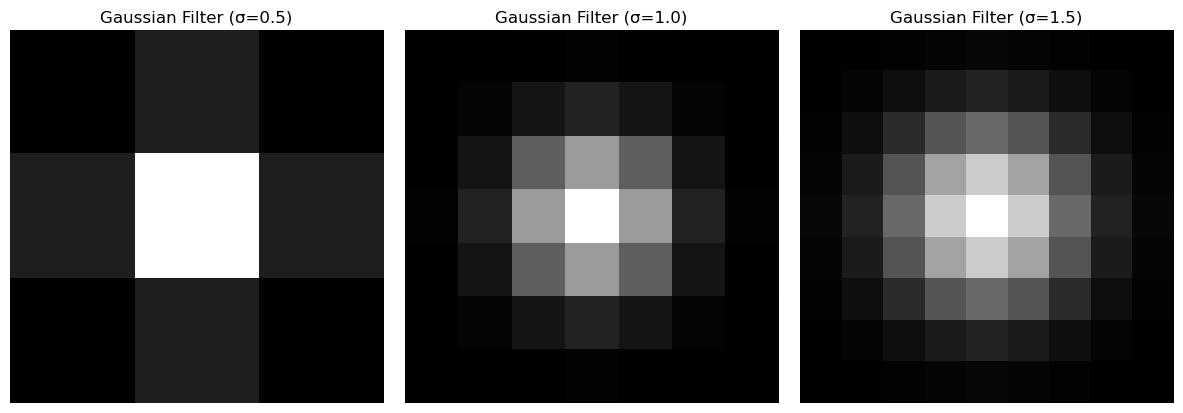

In [37]:
def display_kernel(kernel, winname="Gaussian"):
    kernel_disp = 255 * (kernel - kernel.min()) / (kernel.max() - kernel.min())
    kernel_disp = kernel_disp.astype(np.uint8)
    cv2.imshow(winname, kernel_disp)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



sigma_values = [0.5, 1.0, 1.5]
kernels = [guassian_filter2d(sigma) for sigma in sigma_values]

plt.figure(figsize=(12, 12))
for i, kernel in enumerate(kernels):
    plt.subplot(3, 3, i + 1)
    plt.imshow(kernel, cmap='gray')
    plt.title(f'Gaussian Filter (σ={sigma_values[i]})')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Lab Task 4 – Gaussian Convolution 

880640


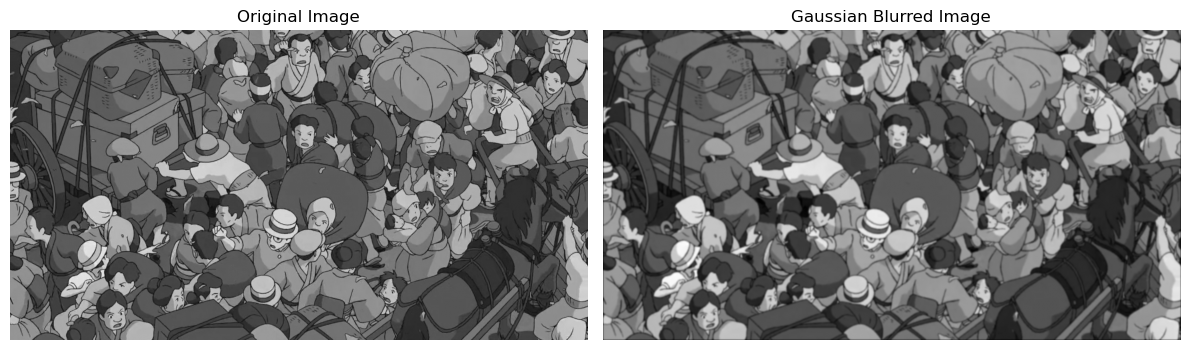

In [38]:

kernel = guassian_filter2d(1.5)

img_out = convolution2d(task1_img, kernel)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(task1_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_out, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### Lab Task 5 – Edge Map Filters 

372096
372096


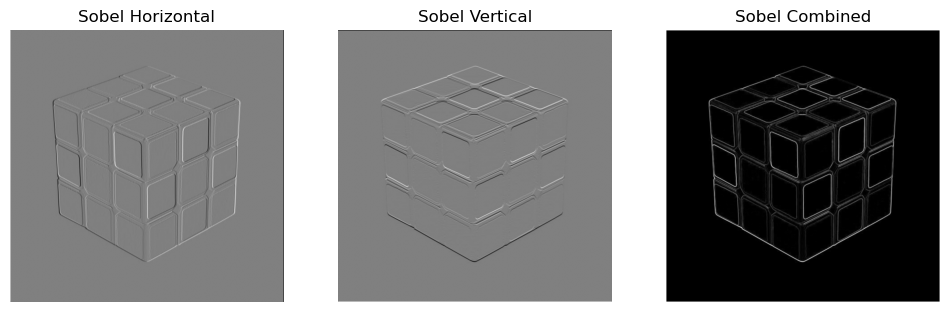

In [39]:



img = cv2.imread("cube.jpg", cv2.IMREAD_GRAYSCALE)


sobel_h = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_v = np.array([[ 1,  2,  1],
                    [ 0,  0,  0],
                    [-1, -2, -1]], dtype=np.float32)


img_edge1 = convolution2d(img, sobel_h)  
img_edge2 = convolution2d(img, sobel_v)  


img_edge_combined = np.sqrt(img_edge1**2 + img_edge2**2)



plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_edge1, cmap='gray')
plt.title("Sobel Horizontal")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_edge2, cmap='gray')
plt.title("Sobel Vertical")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_edge_combined, cmap='gray')
plt.title("Sobel Combined")
plt.axis("off")

plt.show()

### Lab Task 6 – Gaussian Blur and Canny Edges 

(-0.5, 491.5, 359.5, -0.5)

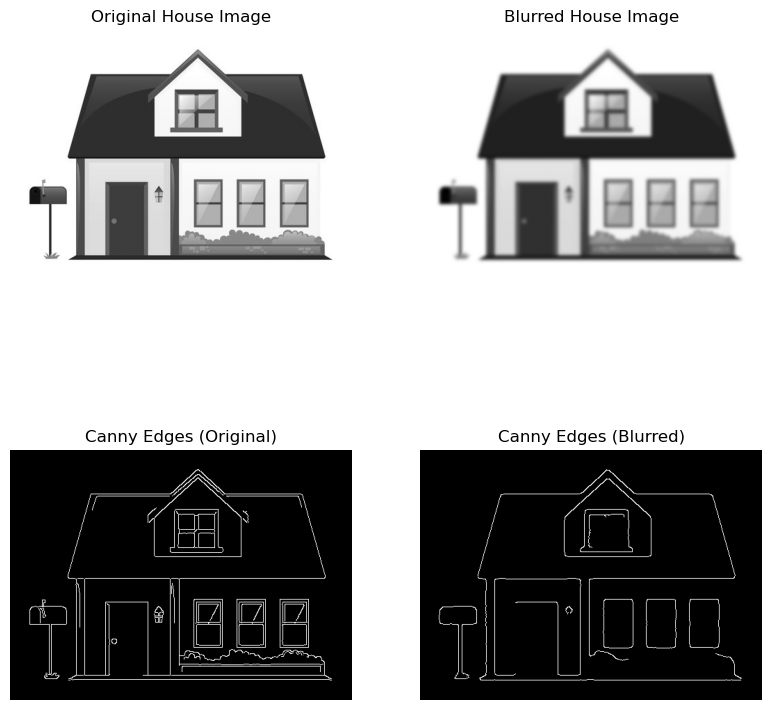

In [40]:

house_img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.imshow(house_img, cmap='gray')
plt.title('Original House Image')
plt.axis('off')

blur_house = cv2.GaussianBlur(house_img, (13, 13), 0)

plt.subplot(2, 3, 2)
plt.imshow(blur_house, cmap='gray')
plt.title('Blurred House Image')
plt.axis('off')

edges = cv2.Canny(house_img, 100, 200)
plt.subplot(2, 3, 4)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges (Original)')
plt.axis('off')

blur_edges = cv2.Canny(blur_house, 100, 200)
plt.subplot(2, 3, 5)
plt.imshow(blur_edges, cmap='gray')
plt.title('Canny Edges (Blurred)')
plt.axis('off')




### Lab Task 7 – Corner Detection 

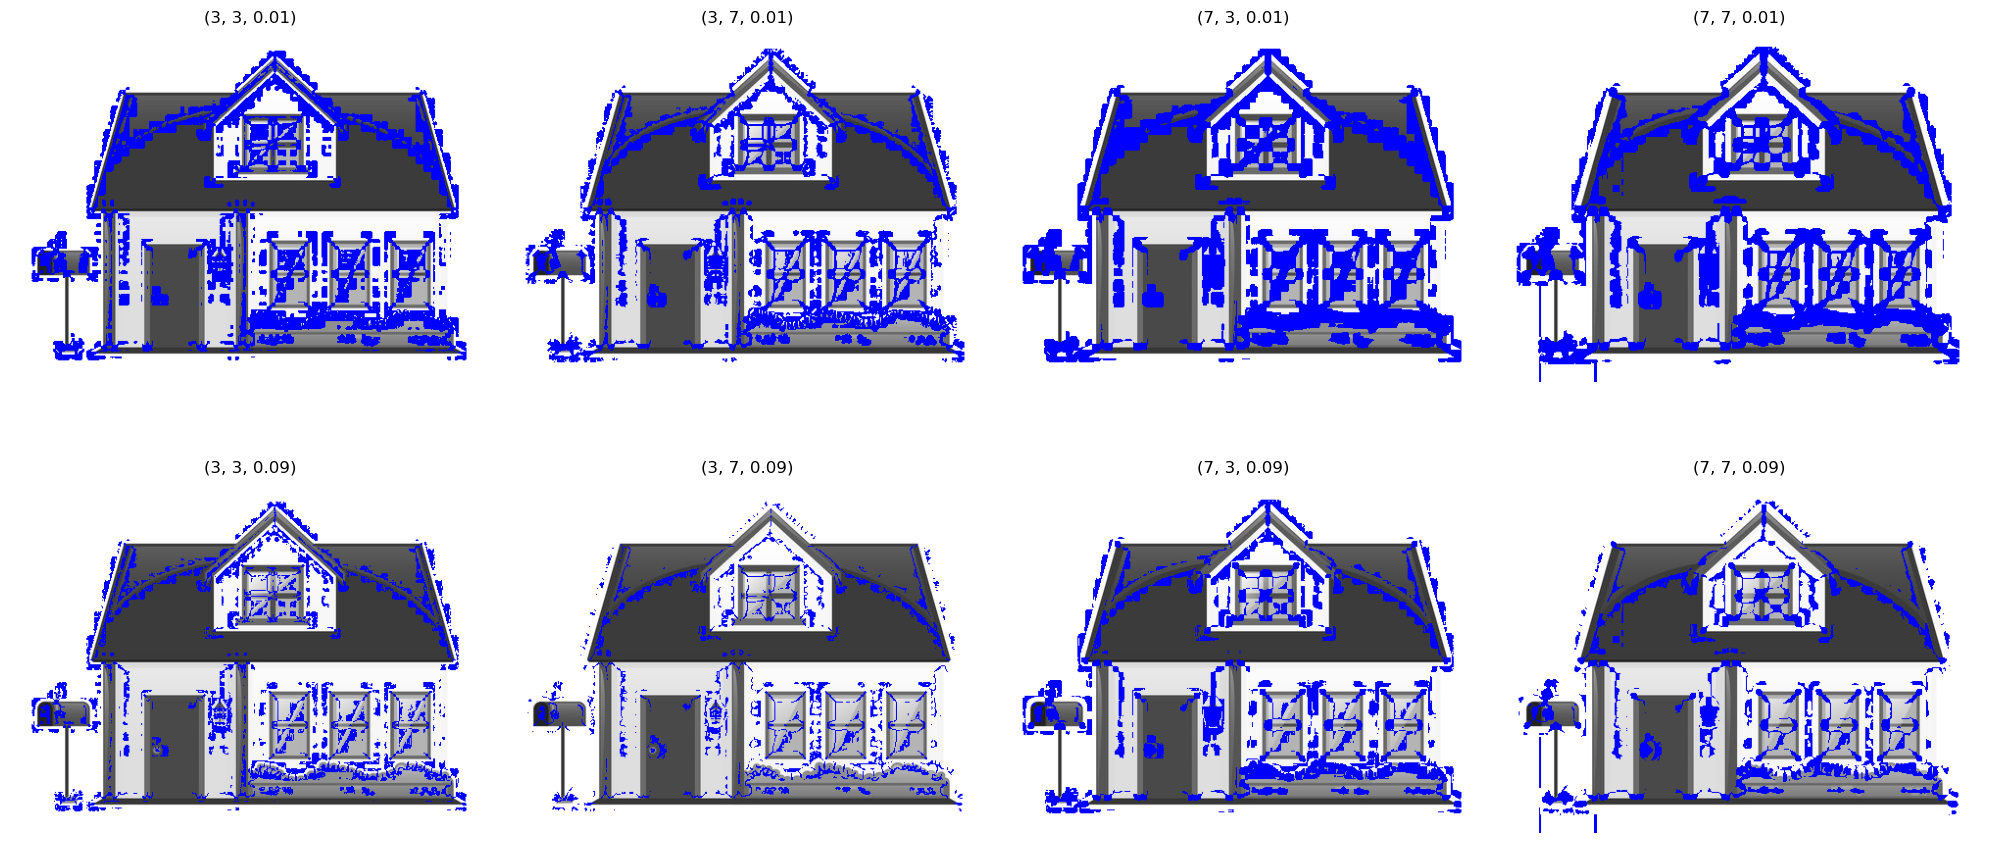

In [41]:

house_img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)


params = [
    (3, 3, 0.01), (3, 7, 0.01), (7, 3, 0.01),(7,7,0.01),
    (3, 3, 0.09), (3, 7, 0.09), (7, 3, 0.09),(7,7,0.09),
]


plt.figure(figsize=(20, 10))

for i, (blockSize, ksize, k) in enumerate(params):
    corners = cv2.cornerHarris(house_img, blockSize, ksize, k)
    
    img_display = cv2.cvtColor(house_img, cv2.COLOR_GRAY2RGB)
    img_display[corners > 0] = [0, 0, 255] 
    
    plt.subplot(2, 4, i + 1)
    plt.imshow(img_display)
    plt.title(f'({blockSize}, {ksize}, {k})')
    plt.axis('off')

plt.tight_layout()
plt.show()

